### summary_plotter_line_days_per_year

#### Robert Peal , January 2025

- Plot the sensitivity of the number of events crossing the line per month to parameter choice

In [17]:
import xarray as xr
# import sys
# sys.path.append("/home/atuin/c104fa/c104fa10/utils")
# import tctools2 as tct
import numpy as np
import matplotlib.pyplot as plt
import pyproj
pyproj.datadir.set_data_dir("/home/atuin/c104fa/c104fa10/software/conda/envs/atmos_sci/share/proj") ## This line is needed to allow geopandas imports
# import cartopy.crs as ccrs
import pandas as pd
# import pickle

#### Data paths

- Should be the same as the dataSavePath vars in `/home/atuin/c104fa/c104fa10/eeaWesterliesPaper/tcWesterlyDays/run_sensitivity_calculate_events_over_line`

In [18]:
dataPath2D = "/home/atuin/c104fa/c104fa10/eeaWesterliesPaper/tcWesterlyDays/sensitivity/eventsLine2D."
dataPath1D = "/home/atuin/c104fa/c104fa10/eeaWesterliesPaper/tcWesterlyDays/sensitivity/eventsLine1D."

directions = [40,45,50]
sizes = [750,1000,1500]
thresholds = [60,70,80]

years = np.arange(1980,2023)
nyears = len(years)

#### Comparing the sensitivity run to the original run

In [19]:
lineWesterlyDaysLoc = f"/home/atuin/c104fa/c104fa10/eeaWesterliesPaper/tcWesterlyDays/eventsLine.30E.-12_05N.1980_2022.csv"
dir=45
size=1000
threshold=70
filePath = f"{dataPath1D}dir.{dir}_thresh.{threshold}_size.{size}.csv"
series1DSensitivity = pd.read_csv(filePath,parse_dates=[0])

series1DOriginal = pd.read_csv(lineWesterlyDaysLoc)

series1DSensitivity


,time,westerlyMask,tc_westerlyMask,longitude,level,quantile
0,1980-01-01,0,0,30.0,700,0.7
1,1980-01-02,0,0,30.0,700,0.7
2,1980-01-03,0,0,30.0,700,0.7
3,1980-01-04,0,0,30.0,700,0.7
4,1980-01-05,1,0,30.0,700,0.7
...,...,...,...,...,...,...
15701,2022-12-27,0,0,30.0,700,0.7
15702,2022-12-28,0,0,30.0,700,0.7
15703,2022-12-29,1,0,30.0,700,0.7
15704,2022-12-30,0,0,30.0,700,0.7


In [20]:
seriesList = []

# line specs
lon=30
latMin=-12
latMax=5

for dir in directions:
    for size in sizes:
        for threshold in thresholds:
            filePath1D = f"{dataPath1D}dir.{dir}_thresh.{threshold}_size.{size}.csv"
            filePath2D = f"{dataPath2D}dir.{dir}_thresh.{threshold}_size.{size}.nc"
            ds2D = xr.open_dataset(filePath2D)
            series1D = pd.read_csv(filePath1D,parse_dates=[0])

            # lineData = ds2D.sel(latitude=slice(latMax,latMin))

            # # #### Save days with a westerly on the line
            # print("Identifying days with a westerly along the line ...")
            # lineWesterlyBinaryArray = xr.where(lineData.max(dim="latitude").compute() > 0,1,0)
            # lineWesterlyBinaryDf = lineWesterlyBinaryArray.to_pandas()

            # print(f"Saving 2D data to {dataSaveLoc2D}")
            # lineData.to_netcdf(dataSaveLoc2D)

            # print(f"Saving 1D data to {filePath1D}")
            # lineWesterlyBinaryDf.to_csv(filePath1D)

            
            # 

            arr = xr.DataArray(data=series1D["westerlyMask"].values.reshape(len(series1D["westerlyMask"]),1,1,1),dims=["time","dir","size","threshold"],coords=dict(time=series1D["time"],dir=[dir],size=[size],threshold=[threshold]))
            seriesList.append(arr)
# ds

ds2D

In [21]:
ds2D.sel(latitude=slice(latMax,latMin))

<xarray.Dataset>
Dimensions:          (latitude: 69, time: 15706)
Coordinates:
    longitude        float32 ...
  * latitude         (latitude) float32 5.0 4.75 4.5 4.25 ... -11.5 -11.75 -12.0
    level            int32 ...
  * time             (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2022-12-31
    quantile         float64 ...
Data variables:
    westerlyMask     (time, latitude) int32 ...
    tc_westerlyMask  (time, latitude) int32 ...

In [22]:
combined = xr.combine_by_coords(seriesList)
combined = xr.where(combined > 0,1,0)
combined

<xarray.DataArray (time: 15706, dir: 3, size: 3, threshold: 3)>
array([[[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]],


       [[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
...
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]],


       [[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]]])
Coordinates:
  * time       (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2022-12-31
  * dir        (dir) int64 40 45 50
  * size       (size) int64 750 1000 1500
  * threshold  (threshold) int64 60 70 80

#### Calculate number of days per month

In [23]:
JF= combined.loc[combined["time"].dt.month.isin([1,2])] # days in JF
JFEventsPerMonth = JF.sum(dim="time") / (nyears * 2)

In [24]:
# combined = xr.combine_by_coords(avgs)

# with open(totalLoc, "rb") as f:
#     seasonTotals = pickle.load(f)


# seasons = ["JF","MAM","JJAS","OND"]

# years = np.arange(1980,2023)

# for seasonix, season in enumerate(seasons):
#     for MJOix, MJO_class in enumerate(combined["MJO_class"].values):

#         seasonClassNumberDays = seasonTotals[season][MJO_class] # number of days in that class and season

#         nmonths = len(season)

#         seasonClassNumberDaysPerMonth = seasonClassNumberDays / (nmonths*len(years)) # average number of days in that class and season per month

#         combined[season].loc[:,:,:,MJO_class] *=  seasonClassNumberDaysPerMonth

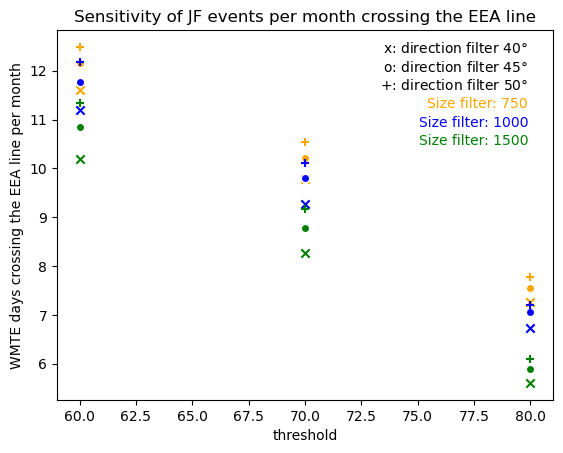

In [25]:
seasonal = JFEventsPerMonth

directions = seasonal["dir"].values
thresholds = seasonal["threshold"].values
sizes = seasonal["size"].values

markers = ["x","o","+"]
colours = ["orange", "blue", "green"]

fig,ax = plt.subplots(1,1)

for dirix,dir in enumerate(directions):

    for sizeix,size in enumerate(sizes):
        data= seasonal.sel(dir=dir,size=size)

        data.plot.scatter(x="threshold",marker=markers[dirix],c=colours[sizeix],ax=ax)#,title=None)

plt.title("Sensitivity of JF events per month crossing the EEA line")
plt.ylabel("WMTE days crossing the EEA line per month")
textOriginY = 0.95
textIntY = 0.05
textOriginX = 0.95
ypos = textOriginY
for dirix,dir in enumerate(directions):
    ax.text(s=f"{markers[dirix]}: direction filter {dir}$\degree$",x=textOriginX,y=ypos,va="center",ha="right",transform=ax.transAxes)
    ypos -= textIntY

for sizeix,size in enumerate(sizes):
    ax.text(s=f"Size filter: {size}",x=textOriginX,y=ypos,va="center",ha="right",transform=ax.transAxes,c=colours[sizeix])
    ypos -= textIntY

#### Rate of change for the different variables

In [26]:
# dataPath = "/home/atuin/c104fa/c104fa10/eeaWesterliesPaper/mjoWesterlyDays/sensitivity/data/mjoClassFracs."
# totalLoc = "/home/atuin/c104fa/c104fa10/eeaWesterliesPaper/mjoWesterlyDays/sensitivity/data/mjoClassTotals.pkl"

# directions = [40,45,50]
# sizes = [750,1000,1500]
# thresholds = [60,70,80]

# lonMin = 25
# lonMax = 35
# latMin = -13
# latMax = -7

In [27]:
# data = []

# for dir in directions:
#     for size in sizes:
#         for threshold in thresholds:
#             filePath = f"{dataPath}dir.{dir}_thresh.{threshold}_size.{size}.nc"
#             ds = xr.open_dataset(filePath)

#             ds = ds.drop_vars(["level","quantile"])

#             box = ds.sel(latitude=slice(latMax,latMin),longitude=slice(lonMin,lonMax))

#             # boxAvg.assign_coords({"dir":dir,"size":size,"threshold":threshold})

#             box = box.expand_dims(dir=1).assign_coords(dir=[dir])#("dir",[dir]))
#             box = box.expand_dims(size=1).assign_coords(size=[size])#("size",[size]))
#             box = box.expand_dims(threshold=1).assign_coords(threshold=[threshold])#("threshold",[threshold]))

#             data.append(box)

In [28]:
# combined = xr.combine_by_coords(data)

# with open(totalLoc, "rb") as f:
#     seasonTotals = pickle.load(f)


# seasons = ["JF","MAM","JJAS","OND"]

# years = np.arange(1980,2023)

# for seasonix, season in enumerate(seasons):
#     for MJOix, MJO_class in enumerate(combined["MJO_class"].values):

#         seasonClassNumberDays = seasonTotals[season][MJO_class] # number of days in that class and season

#         nmonths = len(season)

#         seasonClassNumberDaysPerMonth = seasonClassNumberDays / (nmonths*len(years)) # average number of days in that class and season per month

#         combined[season].loc[:,:,:,MJO_class] *=  seasonClassNumberDaysPerMonth

In [39]:
monthTotals = JFEventsPerMonth

dirDifferential = (monthTotals.diff("dir")).values.flatten() / 5
sizeDifferential = (monthTotals.diff("size")).values.flatten() / 375
threshDifferential = (monthTotals.diff("threshold")).values.flatten() / 10


In [40]:
diffs = [dirDifferential,sizeDifferential,threshDifferential]
diffs

[array([0.11162791, 0.08372093, 0.05813953, 0.11395349, 0.10697674,
        0.06744186, 0.13255814, 0.10232558, 0.05581395, 0.06511628,
        0.06744186, 0.04418605, 0.08139535, 0.0627907 , 0.02790698,
        0.1       , 0.07674419, 0.04186047]),
 array([-0.00108527, -0.00139535, -0.00145736, -0.00269767, -0.00266667,
        -0.00297674, -0.00105426, -0.00108527, -0.00133333, -0.00244961,
        -0.00272868, -0.00313178, -0.00083721, -0.00114729, -0.00155039,
        -0.00220155, -0.00254264, -0.00294574]),
 array([-0.18139535, -0.25232558, -0.19302326, -0.25465116, -0.19186047,
        -0.26627907, -0.19534884, -0.26511628, -0.19651163, -0.2744186 ,
        -0.20697674, -0.28953488, -0.19418605, -0.27674419, -0.20581395,
        -0.29186047, -0.21860465, -0.30697674])]

Text(0.5, 1.0, 'Differential of the number of WMTEs per month in JF')

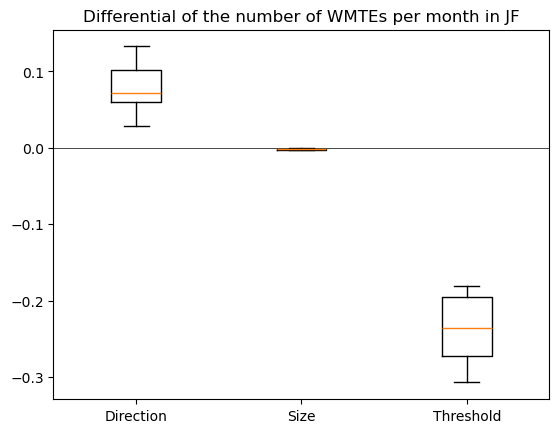

In [42]:
plt.boxplot(diffs,labels=["Direction","Size","Threshold"])
plt.axhline(0,c="k",lw="0.5")
plt.title("Differential of the number of WMTEs per month in JF")

We have calculated the differential along each parameter at each grid point, and divided by the central parameter value